In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('german_credit_train.csv')
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [9]:
df.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

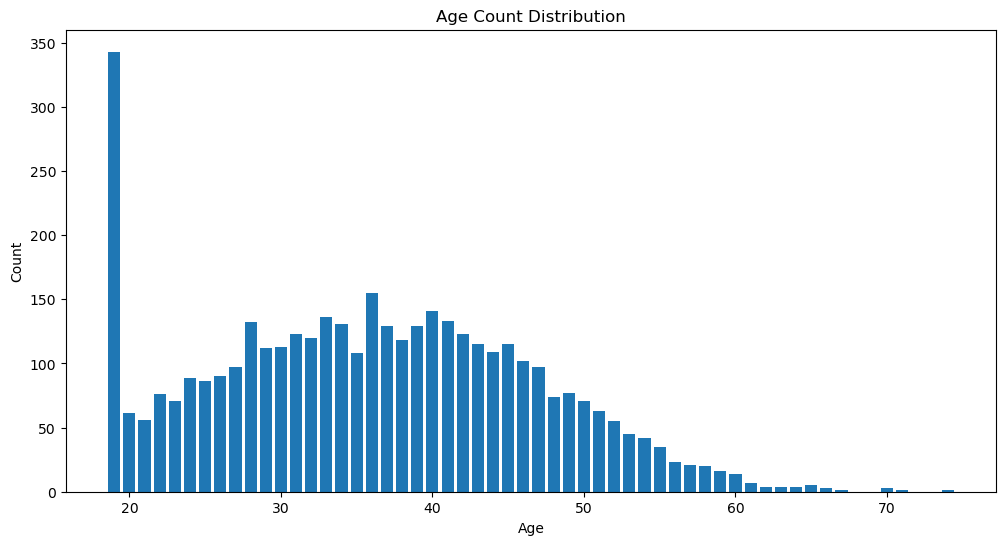

In [51]:
age_cnt = df['Age'].value_counts().sort_index()  # Sort ages in ascending order

# Plot using Matplotlib
plt.figure(figsize=(12,6))
plt.bar(age_cnt.index, age_cnt.values)  # x = Age, y = Count
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Count Distribution")
plt.show()

In [5]:
df['Sex'].value_counts()

Sex
male      2480
female    1519
Name: count, dtype: int64

In [13]:
df['LoanAmount'].describe()

count     3999.000000
mean      3482.700925
std       2498.295579
min        250.000000
25%       1300.500000
50%       3250.000000
75%       5363.000000
max      11676.000000
Name: LoanAmount, dtype: float64

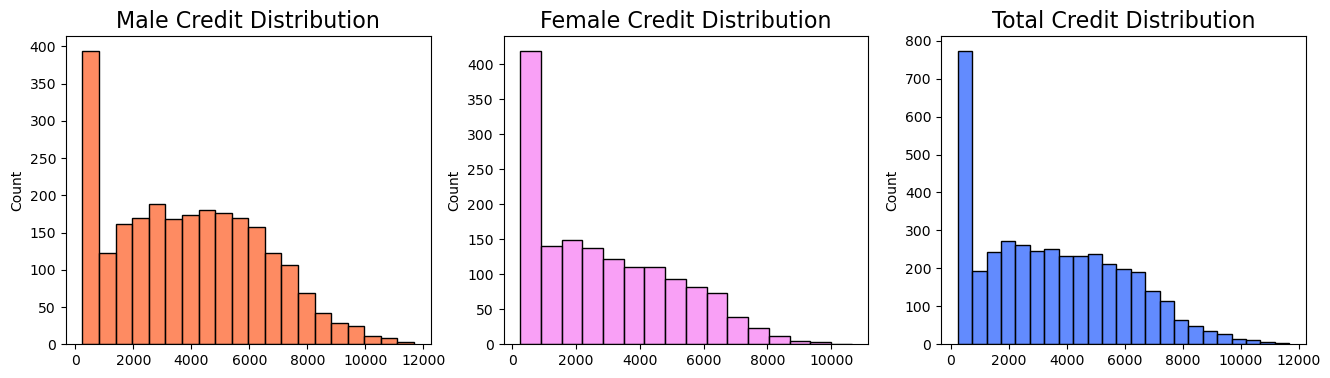

In [10]:
male_credit = df["LoanAmount"].loc[df["Sex"] == "male"].values
female_credit = df["LoanAmount"].loc[df["Sex"] == "female"].values
total_credit = df['LoanAmount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.histplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.histplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.histplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

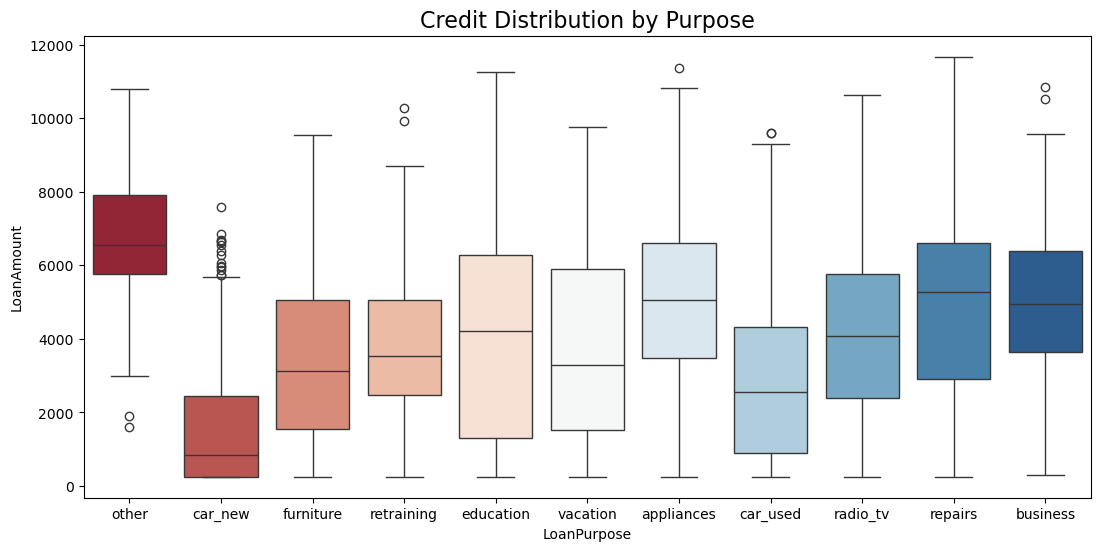

In [ ]:
plt.figure(figsize=(13,6)) #figure size

g = sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df, 
                hue='LoanPurpose', palette="RdBu", legend=False)

g.set_title("Credit Distribution by Purpose", fontsize=16)
# g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
plt.show()